# ${\Large \infty}$ Fibonacci

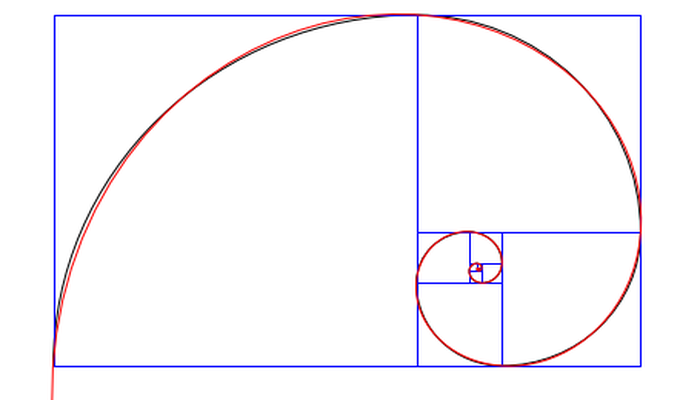

In [12]:
import kilroy
kilroy.Show('fibonacci', 'fibonacci_spiral.png', 700, 400)

*fibonacci spiral and approximate fibonacci spiral*


### Friendly introduction 


At some point most of us come across the Fibonacci sequence. Let's pretend we do not know what it is 
and discover it using this story:


One day your friend convinces you to start up an ibid farm. She gives you an ibid egg which hatches immediately.
You have zero adult ibids and one baby ibid.


${\Huge \infty}$


Please draw a picture of a baby and an adult ibid in your notebook. 



Ibids reproduce by cloning according to the following rules: 


- An ibid hatches and grows for one month to become an adult
- An ibid starts to develop an egg which takes a second month
- At the end of the second month the ibid lays the egg and it hatches immediately
- The ibid lays a new egg every month thereafter
- Ibids are immortal


How long before you are up to your eyelids in ibids? (This is an informal question, not a problem
for you to solve.)




<br> ${\Huge \infty}$


Write down a sequence of numbers: Month by month how many adult ibids do you have? Here is the
start:

```
month 0: 0 adults (plus your one baby)
month 1: 1 adult (your baby grew up; now you have zero babies)
month 2: 1 adult (and one baby: your adult layed an egg that hatched right away)
month 3: 2 adults = original adult plus last month's baby grew up (plus you have one baby)
           (why one baby? because your original ibid just laid its second egg: instant baby ibid)
month 4: 3 adults, 2 babies
  .
  . 
  .
and so on
  .
  .
  .
```


### Extra 

The first problem was to draw the ibids, baby and adult. The second problem was to write down the number of adult ibids
you have after each month. This extra problem is to write down how many baby ibids you have each month.


### Terminology


Please copy the boldface definitions and explain the others to a friend.


- **ibid**: An animal that makes copies of itself by cloning
- **pine cone**: A type of vegetable eaten by ibids
- spiral: A shape that goes round and round while getting larger
- spiral: A shape that goes round and round while getting smaller




<br>${\Huge \infty}$


### The Fibonacci sequence rule


The adult ibid population follows the Fibonacci sequence. This sequence of numbers 
continues onwards without limit. We use three dots to indicate 'and so on forever':


$$Fibonacci\;sequence\;=\;0,\; 1,\; 1,\; 2,\; 3,\; 5,\; 8,\; 13,\; 21,\; 34,\; 55,\; \dots$$


What is the *rule* for the next number? Please write this in your notebook. 



<br>${\Huge \infty}$


### Youzigbert sequence


The 'Fi' in 'Fibonacci' means 'son of' in Italian. Therefore whoever the guy *Fibonacci* was his *father* was 
apparently a fellow named 'Bonacci'. In English the word *you* means *you*. If your name happens to be Zigbert 
then you could be ridiculous about it and refer to yourself as *Youzigbert*... or *Youbert*... or *Mezigbert*. 


However you choose: 


- Please invent a name for yourself. I will use 'Youzigbert'.
- Please invent a numerical sequence and name it after yourself. As in the **Youzigbert Sequence**


Your numerical sequence should follow a rule of some sort. If you use the 'add the last two numbers' 
rule of Fibonacci then please begin with two *different* starting numbers instead of zero and one. 
You are welcome to come up with more than one rule if you like.


We will come back to sequences *similar to* Fibonacci shortly.

<br>${\Huge \infty}$


### Spirality

Please obtain a piece of graph paper and locate a square near the center. Do nothing! You just
drew the $0$ of the Fibonacci sequence. Now for the $1$. We are drawing the Fibonacci numbers as 
squares. Trace the small center-of-the-page square and then trace the square to its right.
Those are squares $1$ and $1$. Remember the sequence is 0, 1, 1, 2, 3, 5, 8, ... so you have 
already done the first three.


Together the two one-squares make a $1\;\times\;2$ rectangle. Trace the $2\;\times\;2$ 
square that rests atop this rectangle. Now the complete traced region is a rectangle $3$ high by $2$ wide. 
On the left side of this rectangle trace the $3\;\times\;3$ square. Next trace the $5$ by $5$ square below.
Here is what it should look like so far:

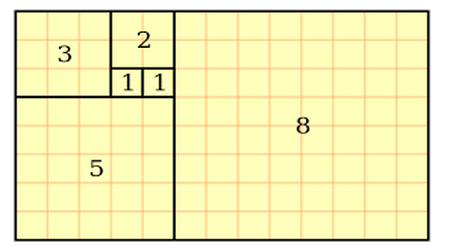

In [13]:
kilroy.Show('fibonacci', 'squares_0112358.png, 450,250)

The idea here is to continue around drawing ever-larger squares. Each square has a 
Fibonacci number as its side. Eventually you run out of room on the page. 


<br>${\Huge \infty}$

Next, inside of this sequence of squares please draw a spiral. It will be similar
to the figure at the top of the page. Start at the left $1$-square and 
draw a quarter circle from the upper left corner to the lower right corner, counter-clockwise.
In the second $1$ square, the one on the right, continue the quarter circle by
drawing another quarter circle counter-clockwise. This one goes from the lower left corner
to the upper right corner of the square. Next draw a quarter circle in the $2$ square from lower right
corner to the upper left corner. Continue this way through all the squares.


<br>${\Huge \infty}$

Try running the program below.


Experiment by re-drawing this spiral at different scales. Use the slider control called 'limit_setter'. 
Write down what you notice about the shape of the spiral as the scale changes. 

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from ipywidgets import *
from traitlets import dlink
pi = np.pi

def dtr(a): return a*pi/180.
def rtd(a): return a*180./pi
def DrawClosedNgon(axis, x, y, c):
    if len(x) < 2: return
    (xl, yl) = ([], [])
    for i in range(len(x)):
        xl.append(x[i])
        yl.append(y[i])
    xl.append(x[0])
    yl.append(y[0])
    axis.plot(xl, yl, color=c)
    return

# Draw a spiral of the form r = a * e^{b * theta}
def DrawLogSpiral(axis, x0, y0, a, b, theta0, theta1, dTheta, c):
    nThetas = int((theta1 - theta0)/dTheta + 1)
    x=[x0]
    y=[y0]
    for i in range(nThetas):
        theta = float(i)*dTheta + theta0
        r = a*np.exp(b*theta)
        x.append(r*np.cos(theta) + x0)
        y.append(r*np.sin(theta) + y0)
    axis.plot(x, y, color=c)
    return

def fiboplot(limit_setter):
    fig, ax = plt.subplots(figsize=(12,10))
    ax.axis('equal')
    ax.set(xlim=(-limit_setter, limit_setter), ylim=(-limit_setter,limit_setter))
    ax.set(xlabel='x axis', ylabel = 'y axis', title='Fibonacci spiral')

    # u[perm=0,1,2,3][step=0,1,2,3],[coord=0,1 for x,y] (but never use step = 3 which just returns to start of box
    u = [[[1,0],[0,1],[-1,0],[0,-1]],[[0,1],[-1,0],[0,-1],[1,0]],[[-1,0],[0,-1],[1,0],[0,1]],[[0,-1],[1,0],[0,1],[-1,0]]]
    th1 = [0.0, pi/2., pi, 3.*pi/2.]
    th2 = [pi/2., pi, 3.*pi/2., 2.*pi]

    # start at (0, 1) heading down towards (0, 0). Each new square we jump ahead two vertices and increase our
    #   heading permutation index by 1 (mod 4). 
    uperm = 3
    nSquares = 40
    (a, b) = (0, 1)
    (cx, cy) = (0, 1.)
    for i in range(nSquares):
        (x, y) = ([cx], [cy])
        box = b
        for j in range(3):
            x.append(x[j] + b*u[uperm][j][0])
            y.append(y[j] + b*u[uperm][j][1])

        # Draw the next square of the Fibonacci numbers       
        DrawClosedNgon(ax, x, y, 'blue')

        # Inscribe an arc: width=height=box makes it circular (these are diameters), angle does not matter (no ellipticity to rotate)
        #   theta1 and theta2 define the bounds of the arc.
        angIndex = (uperm-1)%4
        ax.add_patch(Arc([x[3],y[3]], width=box*2, height=box*2, angle = 0.0, \
                         theta1=rtd(th1[angIndex]), theta2=rtd(th2[angIndex]), fill=False))

        # now advance everything
        (cx, cy) = (x[2], y[2])
        uperm += 1
        if uperm > 3: uperm = 0

        # Calculate the next Fibonacci number. For example a = 5 and b = 8 becomes a = 8 and b = 13.
        a_tmp = a
        a = b
        b = b + a_tmp

    DrawLogSpiral(ax, 0.7, 1.0, 1.3131, .3063489, -pi, 12.0*pi, pi/40., 'red')
    plt.show()
    return

interact(fiboplot, limit_setter=widgets.IntSlider(min=5,max=2500,step=40,value=5))

A Jupyter Widget

<function __main__.fiboplot>

Notice that in the figure above the quarter-circle arcs are drawn in black ink. There is also a curve in red ink
that is similar. The red curve is called a logarithmic spiral. Compare this to the shell of the *chambered nautilus*,
another sea creature that is a mollusc but not a snail.

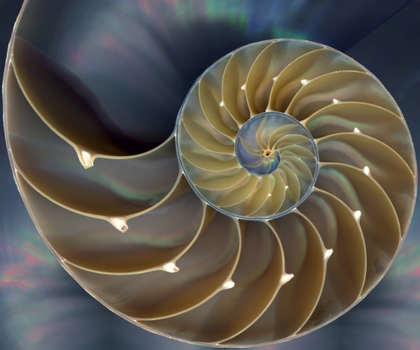

In [15]:
kilroy.Show('geometry', 'nautilus.png',420,350)

*chambered nautilus shell, cross section*

Compare these spirals with those of Sue Snail shown below. Sue is (or was) both a snail and a mollusc.

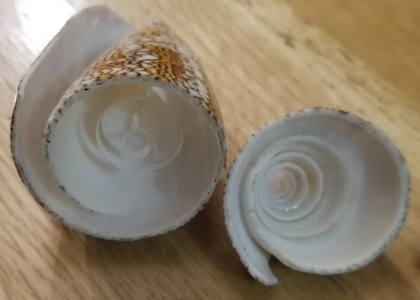

In [16]:
kilroy.Show('geometry', 'conus_textile_spiral.png',420,300)

*a look inside the former home of Sue Snail featuring Sue's idea of a spiral*


### Extra


Sue Snail has long ago abandoned the shell shown above. Cutting off the end cap
reveals the outside spiral from the inside. Would you say that this spiral is similar to
or different from the Fibonacci spiral? How about the nautilus spiral? 


The Fibonacci spiral is similar to another sort of spiral called a logarithmic spiral
(the red curve on the figure above).


The Fibonacci numbers also approximate the *golden ratio*; see the next page. 


If the Fibonacci sequence approximates the *logarithmic spiral*... and the Fibonacci sequence
approximates the *golden ratio*... does this mean that the logarithmic spiral is the same thing
as the golden ratio? I'm not sure this is so... but they definitely have told us 
*'if $a=b$ and $a=c$ then $b=c$'*... so it is worth considering.


Let's return for a moment to the ibids. As an ibid farmer you know that your ibids are
quietly wandering about the ranch munching their favorite foods which are pine cones 
and sunflowers. For more on this you might look up the word *phyllotaxis*. 


I mentioned the *golden ratio* just above. Related: See the **extra** problem in
the notebook **1 A Infinity** near the picture of Alice and the White Rabbit in the hallway.